In [62]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import folium
import json

In [63]:
path = './data/covid_data.csv'
df_indian = pd.read_csv(path)
df_indian.tail()

,State,Confirmed,Recovered,Deaths
32,Arunachal Pradesh,1,1,0
33,Dadra and Nagar Haveli and Daman and Diu,1,1,0
34,Nagaland,0,0,0
35,Lakshadweep,0,0,0
36,Sikkim,0,0,0


## Bước 2: Tính tỉ lệ hồi phục và tử vòng
$$\text{Tỉ lệ hồi phục} = \frac{\text{Hồi phục}}{\text{Số ca xác nhận}} * 100\% \tag{1}$$
$$\text{Tỉ lệ tử vong} = \frac{\text{Tử vong}}{\text{Số ca xác nhận}} * 100\% \tag{2}$$

In [64]:
df_indian['Recovered'] = df_indian['Recovered'].div(df_indian['Confirmed']) * 100
df_indian['Deaths'] = df_indian['Deaths'].div(df_indian['Confirmed']) * 100

df_indian.fillna({'Recovered': 0, 'Deaths': 0}, inplace=True)
df_indian.head()

,State,Confirmed,Recovered,Deaths
0,Maharashtra,41642,28.159070,3.491667
1,Tamil Nadu,13967,44.977447,0.680175
2,Gujarat,12910,42.509682,5.987607
3,Delhi,11659,47.748520,1.663951
4,Rajasthan,6227,55.965955,2.424924


## Bước 3: Trực quan hóa(3D) dữ liệu trước khi áp dụng K-Means:

Text(0.5, 0, 'Death %')

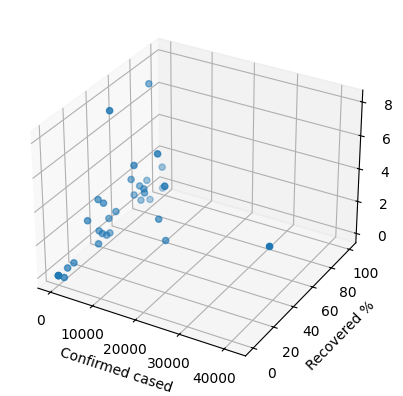

In [65]:

fig = plt.figure()
# tạo lưới 1 hàng 1 cột và đặt plot ở vị trí 1
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_indian['Confirmed'], df_indian['Recovered'], df_indian['Deaths'])
ax.set_xlabel('Confirmed cased')
ax.set_ylabel('Recovered %')
ax.set_zlabel('Death %')

## Bước 4 : Cài đặt Kmeans

### Find Kmeans optimize

In [66]:

scaler = MinMaxScaler()
data_train = df_indian[['Recovered', 'Deaths']].to_numpy()

data_train = scaler.fit_transform(data_train)


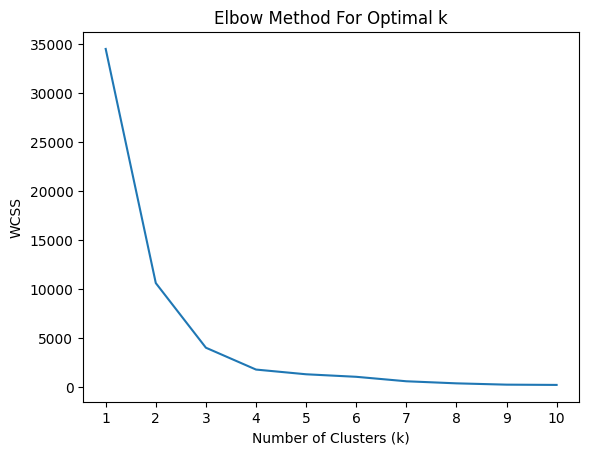

In [67]:
wcss_lst = []
k_range = range(1, 11)


for i in k_range:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_train)
    wcss = kmeans.inertia_
    wcss_lst.append(wcss)

sns.lineplot(y=wcss_lst, x=k_range)
plt.xticks(ticks=k_range)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

### Choose K = 4

In [68]:
kmeans1 = KMeans(n_clusters=4, random_state=1)


kmeans1.fit_predict(data_train)

df_indian['Zone'] = kmeans1.labels_
df_indian

,State,Confirmed,Recovered,Deaths,Zone
0,Maharashtra,41642,28.159070,3.491667,0
1,Tamil Nadu,13967,44.977447,0.680175,0
2,Gujarat,12910,42.509682,5.987607,0
3,Delhi,11659,47.748520,1.663951,2
4,Rajasthan,6227,55.965955,2.424924,2
5,Madhya Pradesh,5981,47.550577,4.531015,2
6,Uttar Pradesh,5515,58.096102,2.502267,2
7,West Bengal,3197,37.316234,8.101345,0
8,Andhra Pradesh,2605,65.451056,2.072937,2
9,Punjab,2028,89.694280,1.923077,1


### lắp lại label (Tính mức độ nguy hiểm của các label , rồi lắp lại có thứ tự để biểu diễn độ nguy hiểm của nó)

In [69]:
pk = []
for i in range(4):
    avg_confirm_cluster = (df_indian.loc[df_indian['Zone'] == i]['Confirmed'].sum()) / (len(df_indian.loc[df_indian["Zone"] == i]))
    pk.append((i, avg_confirm_cluster))
pk.sort(key=lambda a: a[1])
print("Avg each cluster: ", pk)

mapper = {}
for i, item in enumerate(pk):
    mapper[i] = item[0]

'''
key : thứ tự (mức độ nguy hiểm)
value : label
'''
print("Thứ tự nguy hiểm của các label", mapper)

Avg each cluster:  [(3, 246.66666666666666), (1, 320.6), (2, 4520.75), (0, 5951.846153846154)]
Thứ tự nguy hiểm của các label {0: 3, 1: 1, 2: 2, 3: 0}


In [70]:
# Thay label
df_india = df_indian.replace({"Zone": mapper})
df_india

,State,Confirmed,Recovered,Deaths,Zone
0,Maharashtra,41642,28.159070,3.491667,3
1,Tamil Nadu,13967,44.977447,0.680175,3
2,Gujarat,12910,42.509682,5.987607,3
3,Delhi,11659,47.748520,1.663951,2
4,Rajasthan,6227,55.965955,2.424924,2
5,Madhya Pradesh,5981,47.550577,4.531015,2
6,Uttar Pradesh,5515,58.096102,2.502267,2
7,West Bengal,3197,37.316234,8.101345,3
8,Andhra Pradesh,2605,65.451056,2.072937,2
9,Punjab,2028,89.694280,1.923077,1


Text(0.5, 0, 'Death %')

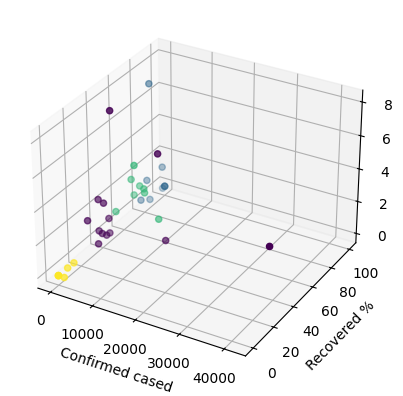

In [71]:
fig = plt.figure()
# tạo lưới 1 hàng 1 cột và đặt plot ở vị trí 1
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_indian['Confirmed'], df_indian['Recovered'], df_indian['Deaths'], c=df_indian['Zone'].to_list())
ax.set_xlabel('Confirmed cased')
ax.set_ylabel('Recovered %')
ax.set_zlabel('Death %')

In [72]:
path_state = './data/state_coords.json'
with open(path_state, 'r') as f:
    state_coords = json.load(f)

In [73]:
# Create a map centered on India
map_india = folium.Map( location =[20.5937 , 78.9629] , zoom_start =4)
for index, row in df_indian.iterrows():
    state = row['State']
    zone = row['Zone']

    coord = state_coords.get(state)
    if coord != None:
        if zone == 0:
            color = 'green'
        elif zone == 1:
            color = 'orange'
        elif zone == 2:
            color = 'red'
        elif zone == 3:
            color = 'black'

        folium.Marker(
            location=[coord[0], coord[1]],
            popup=f'{state} - Zone {zone}',
            icon=folium.Icon(color)
        ).add_to(map_india)
map_india

## So sánh giữa xài Scaler và không xài Scaler

In [74]:
from sklearn.preprocessing import StandardScaler
# Không dùng scaler
kmeans_no_scaler = KMeans(n_clusters=4, random_state=1)
kmeans_no_scaler.fit(df_indian[['Recovered', 'Deaths']])
wcss_no_scaler = kmeans_no_scaler.inertia_

scaler = StandardScaler()
data_train = df_indian[['Recovered', 'Deaths']].to_numpy()

data_train = scaler.fit_transform(data_train)

# Dùng Standard Scaler
kmeans_with_scaler = KMeans(n_clusters=4, random_state=1)
kmeans_with_scaler.fit(data_train)
wcss_with_scaler = kmeans_with_scaler.inertia_

print(f"WCSS không dùng scaler: {wcss_no_scaler}")
print(f"WCSS dùng scaler: {wcss_with_scaler}")

WCSS không dùng scaler: 2101.6655841525494
WCSS dùng scaler: 13.715403080089605
